In [21]:
import numpy as np 
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import seaborn as sns

In [22]:
df = pd.read_csv('telecom_customer_churn.csv')
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [23]:
df['City'].value_counts()

Los Angeles         293
San Diego           285
San Jose            112
Sacramento          108
San Francisco       104
                   ... 
Johannesburg          2
South Lake Tahoe      2
Jacumba               2
Holtville             2
Eldridge              2
Name: City, Length: 1106, dtype: int64

In [24]:
df = df.replace(['Female','Male'],[0,1])


df.columns

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason'],
      dtype='object')

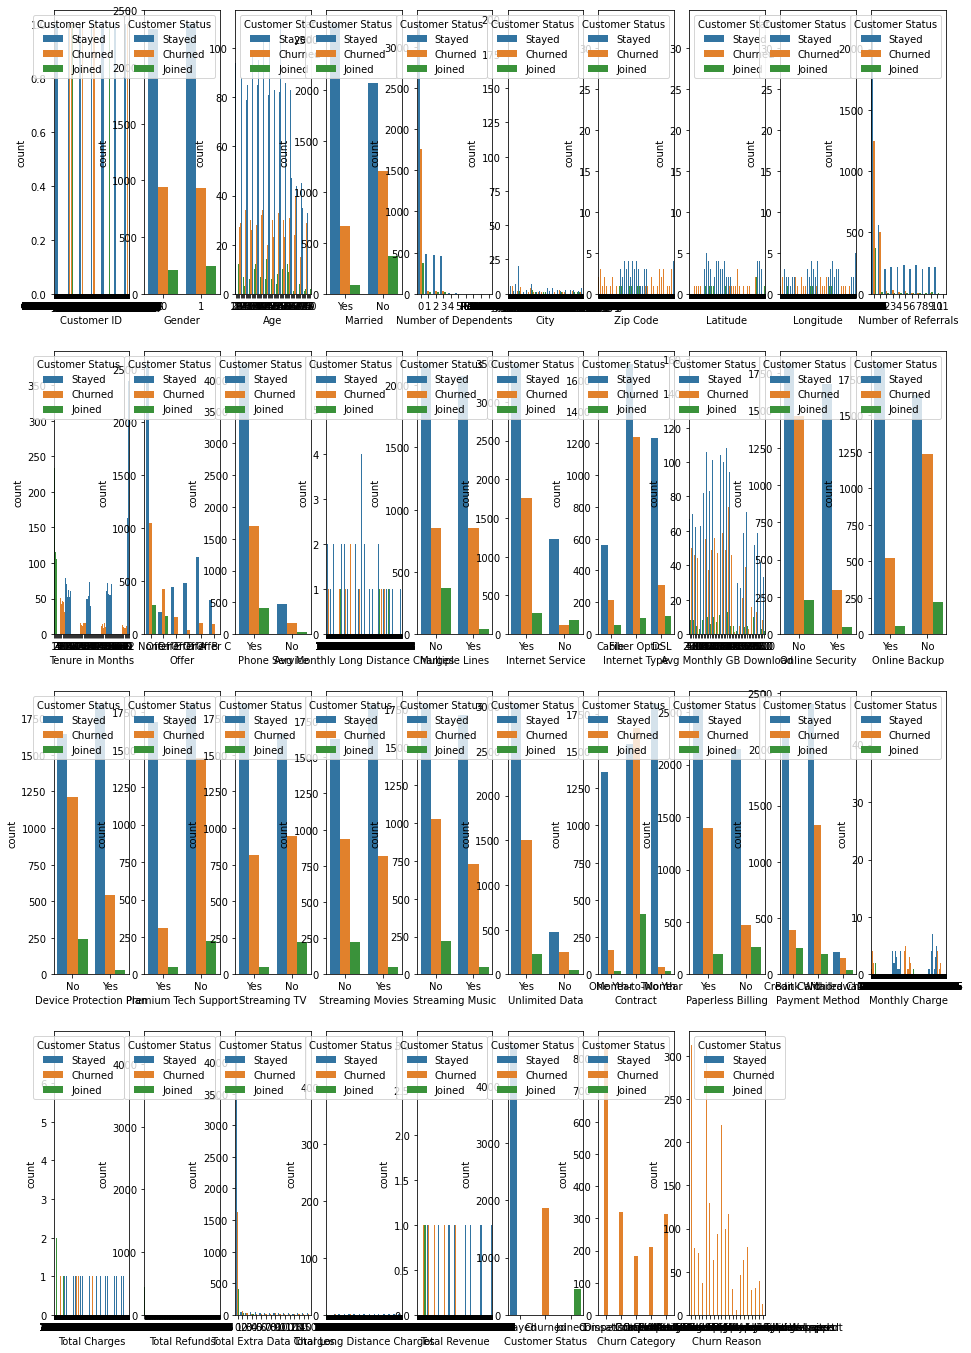

In [25]:
fig = plt.figure(figsize=(16,24))
for i in range(len(df.columns)):
    clumn = df.columns[i]
    sub = fig.add_subplot(4,10,i+1)
    chart = sns.countplot(data=df,x=clumn,hue='Customer Status')

In [26]:
X = df[['Age', 'Married', 'Number of Dependents',
        'Number of Referrals',
        'Tenure in Months','Phone Service',
        'Multiple Lines',
        'Internet Service',
        'Online Security', 'Online Backup', 'Device Protection Plan',
        'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
        'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
        'Payment Method', 'Monthly Charge', 'Total Charges',
        'Total Revenue']]

X = X.replace(['Yes','No'],[1,0])

Y = np.asanyarray(df[['Customer Status']])
X.head()

,Age,Married,Number of Dependents,Number of Referrals,Tenure in Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,...,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Revenue
0,37,1,0,2,9,1,0.0,1,0.0,1.0,...,1.0,0.0,0.0,1.0,One Year,1,Credit Card,65.6,593.30,974.81
1,46,0,0,0,9,1,1.0,1,0.0,0.0,...,0.0,1.0,1.0,0.0,Month-to-Month,0,Credit Card,-4.0,542.40,610.28
2,50,0,0,0,4,1,0.0,1,0.0,0.0,...,0.0,0.0,0.0,1.0,Month-to-Month,1,Bank Withdrawal,73.9,280.85,415.45
3,78,1,0,1,13,1,0.0,1,0.0,1.0,...,1.0,1.0,0.0,1.0,Month-to-Month,1,Bank Withdrawal,98.0,1237.85,1599.51
4,75,1,0,3,3,1,0.0,1,0.0,0.0,...,1.0,0.0,0.0,1.0,Month-to-Month,1,Credit Card,83.9,267.40,289.54


In [27]:
X= np.asanyarray(X)
from sklearn import preprocessing

con_la = preprocessing.LabelEncoder()
con_la.fit(['Month-to-Month','Two Year','One Year'])
X[:,16] = con_la.transform(X[:,16])

pay_la = preprocessing.LabelEncoder()
pay_la.fit(['Bank Withdrawal','Credit Card','Mailed Check'])
X[:,18] = pay_la.transform(X[:,18])

y_la = preprocessing.LabelEncoder()
y_la.fit(['Churned','Stayed','Joined'])
Y = y_la.transform(Y)
X[0:5]


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[37, 1, 0, 2, 9, 1, 0.0, 1, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0,
        1.0, 1, 1, 1, 65.6, 593.3, 974.81],
       [46, 0, 0, 0, 9, 1, 1.0, 1, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0,
        0.0, 0, 0, 1, -4.0, 542.4, 610.28],
       [50, 0, 0, 0, 4, 1, 0.0, 1, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0,
        1.0, 0, 1, 0, 73.9, 280.85, 415.45],
       [78, 1, 0, 1, 13, 1, 0.0, 1, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0,
        1.0, 0, 1, 0, 98.0, 1237.85, 1599.51],
       [75, 1, 0, 3, 3, 1, 0.0, 1, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0,
        1.0, 0, 1, 1, 83.9, 267.4, 289.54]], dtype=object)

In [28]:
scaler = preprocessing.StandardScaler()
X = scaler.fit(X).transform(X.astype(float))
X = np.nan_to_num(X)

X[0:5]

array([[-0.56777322,  1.03453023, -0.4868349 ,  0.01603903, -0.95299362,
         0.32743831, -0.93616301,  0.52592737, -0.75972822,  1.12752165,
        -0.88461998,  1.30350273,  1.01884714, -0.99043903, -0.90630745,
         0.40335788,  0.28902128,  0.8297975 ,  0.83470403,  0.06422137,
        -0.74449996, -0.71887199],
       [-0.03043292, -0.96662231, -0.4868349 , -0.65040855, -0.95299362,
         0.32743831,  1.06819004,  0.52592737, -0.75972822, -0.88690093,
        -0.88461998, -0.76716372, -0.9815015 ,  1.00965326,  1.10337833,
        -2.47918798, -0.88965671, -1.20511329,  0.83470403, -2.16636714,
        -0.76696186, -0.84610754],
       [ 0.20838499, -0.96662231, -0.4868349 , -0.65040855, -1.15673995,
         0.32743831, -0.93616301,  0.52592737, -0.75972822, -0.88690093,
         1.13042891, -0.76716372, -0.9815015 , -0.99043903, -0.90630745,
         0.40335788, -0.88965671,  0.8297975 , -0.83351971,  0.33022546,
        -0.88238248, -0.914111  ],
       [ 1.88011037

In [29]:
x_train , x_test , y_train ,y_test = train_test_split(X,Y,test_size=0.3,random_state=4)


In [30]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

#knn model for difrent ks
ks = 10
acc_matrix = []
auc_matrix = []
ks_array = []
for k in range(1,ks):
  neigh = KNeighborsClassifier(n_neighbors=k).fit(x_train,y_train)
  y_hat = neigh.predict(x_test)
  acc_matrix.append(metrics.accuracy_score(y_test,y_hat))
  ks_array.append(k)

datas = {'k':ks_array,'accuracy':acc_matrix}
k_df = pd.DataFrame(datas)

acc_np = np.asanyarray(acc_matrix)
print('the best k is: {} with accuracy: {}'.format(acc_np.argmax()+1,acc_np.max()))

k_df


  


the best k is: 8 with accuracy: 0.7553241836251775


,k,accuracy
0,1,0.716517
1,2,0.687175
2,3,0.744912
3,4,0.739233
4,5,0.753904
5,6,0.754378
6,7,0.753904
7,8,0.755324
8,9,0.752958


In [31]:
my_models = [
    LogisticRegression(solver = 'liblinear'),
    SVC(),
    DecisionTreeClassifier(),
    KNeighborsClassifier(n_neighbors=8)
]
model_list = ['logestic reg','svm','decisiontree','KNN']
acc_list = []
auc_list = []

for model in my_models:
  model.fit(x_train,y_train)
  y_hat = model.predict(x_test)
  acc_list.append(metrics.accuracy_score(y_test,y_hat))

datas = {'model':model_list,'accuracy':acc_list}
model_df = pd.DataFrame(datas)
model_np = np.asanyarray(model_df)
print('best model is  logestic_regression with accuracy : {}%'.format(model_np[:,1].max()*100 ))
model_df

best model is  logestic_regression with accuracy : 80.64363464268813%


,model,accuracy
0,logestic reg,0.806436
1,svm,0.805017
2,decisiontree,0.787506
3,KNN,0.755324


made by alireza rezaei
<a href='alirezarezaei.pythonanywhere.com' style='color:"red";'>
```
alireza rezaei 
```
</a>
